<a href="https://colab.research.google.com/github/IA2021UR/practica-4-joferne/blob/main/practica4_parte3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 4 Parte III. Reducción de la dimensionalidad

Vamos a ver cómo funciona el algoritmo de PCA utilizado un dataset muy conocido en el mundo del aprendizaje automático: el dataset de los dígitos. 

El dataset de los dígitos está compuesto por 1797 imágenes de dígitos manuscritos de tamaño 8x8. Este dataset se utiliza normalmente para algoritmos de clasificación (que veremos más adelante), pero también es un buen ejemplo para ver los algoritmos de clustering y de reducción de dimensionalidad. 

Cada dígito viene representado por un vector de 64 componentes que corresponden a los valores de cada pixel del dígito. Para más información sobre este dataset ver: http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html.

En esta parte de la práctica compararemos los resultados que se obtienen utilizando K-means y K-means combinado con PCA. Para ello empezamos cargando las librerías necesarias. 

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Fijamos la semilla para obtener siempre los mismos resultados.

In [2]:
np.random.seed(42)

Cargamos el dataset de los dígitos.

In [3]:
digits = load_digits()

Obtenemos los descriptores de las instancias y estandarizamos (veremos en qué consiste este proceso más adelante) el dataset.

In [4]:
data = scale(digits.data)

Mostramos el número de instancias del dataset y el número de descriptores.

In [5]:
n_instancias, n_descriptores = data.shape
print("n_instancias %d, n_descriptores %d" % (n_instancias, n_descriptores))

n_instancias 1797, n_descriptores 64


Construimos el estimador K-means. Tenemos 10 clusters ya que de antemano sabemos que hay 10 posibles dígitos y por lo tanto 10 posibles grupos.

In [6]:
estimator = KMeans(n_clusters=10)

Realizamos la agrupación por clusters y mostramos el tiempo necesario

In [7]:
%%time 
estimator.fit(data)

CPU times: user 393 ms, sys: 330 ms, total: 722 ms
Wall time: 388 ms


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Ahora definimos una función que nos indica para cada clase la distribución en clusters. Notad que los clusters no están ordenados.

In [8]:
def valida_digits(etiquetas_esperadas, etiquetas_obtenidas):
    for i in range(0,10):
        res = np.zeros(10).astype("uint8")
        for j,etiqueta in enumerate(etiquetas_esperadas):
            if(etiqueta==i):
                res[etiquetas_obtenidas[j]]+=1
        print("Dígito " + str(i) + ": ")
        print(res)

Mostramos la distribución de los dígitos.

In [9]:
valida_digits(digits.target,estimator.labels_)

Dígito 0: 
[  0   0   0   0 177   1   0   0   0   0]
Dígito 1: 
[ 0 58  1  0  0  0  0 27  0 96]
Dígito 2: 
[ 0  4 92  7  0  0  0 46  1 27]
Dígito 3: 
[  0   0  11 157   0   0   0   1   7   7]
Dígito 4: 
[  0   8   1   0   0 157   9   0   4   2]
Dígito 5: 
[ 4  4 81 76  0  3  0  0  5  9]
Dígito 6: 
[172   1   0   0   1   0   0   1   0   6]
Dígito 7: 
[  0   3   8   0   0   0  17   0 151   0]
Dígito 8: 
[ 2 13 15 47  0  0  0  0  2 95]
Dígito 9: 
[  0  19   2 146   0   0   3   0   8   2]


Repetimos el proceso pero esta vez aplicando el algoritmo de PCA tomando 20 componentes principales

In [10]:
%%time 
pca = PCA(n_components=20).fit(data)
data_r = pca.transform(data)
estimator = KMeans(n_clusters=10)
estimator.fit(data_r)

CPU times: user 266 ms, sys: 324 ms, total: 589 ms
Wall time: 321 ms


In [11]:
valida_digits(digits.target,estimator.labels_)

Dígito 0: 
[  0   0   0   0 177   0   0   0   0   1]
Dígito 1: 
[ 0  1 58 96  0 27  0  0  0  0]
Dígito 2: 
[ 0  3  6 34  0 55 76  3  0  0]
Dígito 3: 
[  0   9   0   8   0   2  13 151   0   0]
Dígito 4: 
[  0   4   7   4   0   0   0   0   9 157]
Dígito 5: 
[ 3  2  2 61  0  0 42 70  0  2]
Dígito 6: 
[173   0   1   6   1   0   0   0   0   0]
Dígito 7: 
[  0 150   3   0   0   0   8   0  17   1]
Dígito 8: 
[ 3  3 16 97  0  0  8 47  0  0]
Dígito 9: 
[  0   9  19   4   0   3   0 142   3   0]


***
## Ejercicio 
Compara los resultados tanto en tiempo, como en distribución de los clusters utilizando PCA y sin utilizarlo.

In [16]:
%%time 
estimator.fit(data)

CPU times: user 390 ms, sys: 331 ms, total: 721 ms
Wall time: 380 ms


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
valida_digits(digits.target,estimator.labels_)

Dígito 0: 
[  0   0 177   0   0   0   1   0   0   0]
Dígito 1: 
[ 0 27  0  0  1 58  0  0  0 96]
Dígito 2: 
[ 3 54  0  0  2  5  0  0 77 36]
Dígito 3: 
[151   2   0   0   8   0   0   0  13   9]
Dígito 4: 
[  0   0   0   9   4   7 157   0   0   4]
Dígito 5: 
[72  0  0  0  2  2  2  2 41 61]
Dígito 6: 
[  0   0   1   0   0   1   0 175   0   4]
Dígito 7: 
[  0   0   0  18 151   3   0   0   7   0]
Dígito 8: 
[46  0  0  0  2 16  0  3  9 98]
Dígito 9: 
[145   0   0   3   8  19   0   0   0   5]


In [19]:
%%time 
pca = PCA(n_components=20).fit(data)
data_r = pca.transform(data)
estimator = KMeans(n_clusters=10)
estimator.fit(data_r)

CPU times: user 271 ms, sys: 305 ms, total: 576 ms
Wall time: 315 ms


In [20]:
valida_digits(digits.target,estimator.labels_)

Dígito 0: 
[177   0   0   0   0   0   0   0   1   0]
Dígito 1: 
[ 0  1  0 96  0 58  0 27  0  0]
Dígito 2: 
[ 0  2  3 38  0  5  0 55  0 74]
Dígito 3: 
[  0   9 151   8   0   0   0   2   0  13]
Dígito 4: 
[  0   4   0   4   9   7   0   0 157   0]
Dígito 5: 
[ 0  2 70 61  0  2  3  0  2 42]
Dígito 6: 
[  1   0   0   6   0   1 173   0   0   0]
Dígito 7: 
[  0 149   0   0  18   3   0   0   1   8]
Dígito 8: 
[ 0  3 47 97  0 16  3  0  0  8]
Dígito 9: 
[  0   9 142   4   3  19   0   3   0   0]


Sin utilizar PCA tarda 730ms mientras que aplicando la reducción de dimensionalidad mediante PCA tarda 605ms. Mejora el rendimiento en un 17.12%. La distribución podemos compararla observando los valida_digits de arriba.

***

Utilizando los siguientes comandos podemos ver el porcentaje de varianza explicado por cada una de las componentes de PCA y el total.

In [21]:
print(pca.explained_variance_ratio_)
print("Varianza total: " + str(100*np.sum(pca.explained_variance_ratio_))+ "%")

[0.12033916 0.09561054 0.08444415 0.06498408 0.04860155 0.04214119
 0.03942082 0.0338938  0.02998219 0.02931987 0.02781796 0.02577044
 0.02275222 0.02227097 0.02165173 0.01914093 0.01775415 0.01636319
 0.01596108 0.01488149]
Varianza total: 79.3101513378981%


La siguiente función nos genera un gráfico mostrando la varianza acumulada y la varianza individual que se obtiene al considerar distintos valores como componentes principales (en concreto va tomando valores entre 1 y el número de descriptores). Además esta función muestra la varianza total para cada caso.

In [22]:
def drawVarianza(data):
    pcas = [PCA(n_components=k).fit(data) for k in range(1,len(data[0]))]
    var = [pca.explained_variance_ratio_[-1] for pca in pcas]
    varianzas = [np.sum(pca.explained_variance_ratio_) for pca in pcas]
    for k in range(1,len(data[0])):
        print("Varianza total (%s componentes): %s" % (k,str(100 * varianzas[k-1])))
    plt.clf()

    plt.step(range(1,len(data[0])),varianzas,where='mid',label='varianza acumulada')
    plt.bar(range(1,len(data[0])),var,alpha=0.5,align='center',label='varianza individual')
    plt.xlabel('Componentes principales')
    plt.ylabel('Ratio de varianza explicada')
    plt.show()

Varianza total (1 componentes): 12.033916097277917
Varianza total (2 componentes): 21.594970401567124
Varianza total (3 componentes): 30.03938539073088
Varianza total (4 componentes): 36.537793127295245
Varianza total (5 componentes): 41.39794582363952
Varianza total (6 componentes): 45.61204646794234
Varianza total (7 componentes): 49.55173912610355
Varianza total (8 componentes): 52.94211207657358
Varianza total (9 componentes): 55.938578279652184
Varianza total (10 componentes): 58.867526811530425
Varianza total (11 componentes): 61.65280957217304
Varianza total (12 componentes): 64.22985800954153
Varianza total (13 componentes): 66.50501071233191
Varianza total (14 componentes): 68.73274261280605
Varianza total (15 componentes): 70.89638624908173
Varianza total (16 componentes): 72.8082133813029
Varianza total (17 componentes): 74.58778137711462
Varianza total (18 componentes): 76.21893253805173
Varianza total (19 componentes): 77.82176637503571
Varianza total (20 componentes): 79.

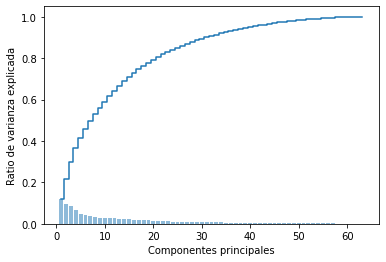

In [23]:
drawVarianza(data)

*** 
## Ejercicio
En clase hemos visto que para elegir el número de componentes k, debemos tomar el menor k tal que la varianza total sea mayor que el 99%. En nuestro caso, ¿qué valor deberíamos tomar?

In [25]:
def determina_componentes(data):
    pcas = [PCA(n_components=k).fit(data) for k in range(1,len(data[0]))]
    var = [pca.explained_variance_ratio_[-1] for pca in pcas]
    varianzas = [np.sum(pca.explained_variance_ratio_) for pca in pcas]
    for k in range(1,len(data[0])):
      if((100 * varianzas[k-1]) > 99.0):
        print("Varianza total (%s componentes): %s" % (k,str(100 * varianzas[k-1])))

determina_componentes(data)

Varianza total (54 componentes): 99.07660487766971
Varianza total (55 componentes): 99.2445512651653
Varianza total (56 componentes): 99.40578732742202
Varianza total (57 componentes): 99.55355002152811
Varianza total (58 componentes): 99.6886684328652
Varianza total (59 componentes): 99.8137691753625
Varianza total (60 componentes): 99.91746490551822
Varianza total (61 componentes): 100.00000000000003
Varianza total (62 componentes): 100.00000000000003
Varianza total (63 componentes): 100.00000000000003


A partir de 54 componentes (incluido) la varianza es mayor que el 99%. Por tanto deberíamos tomar 54 componentes.

***

## Ejercicio adicional
Recupera los ficheros de la práctica 3 y repite el análisis hecho para el dataset de los dígitos, pero esta vez utilizando el dataset iris.csv.


In [27]:
import pandas as pd

In [26]:
!wget https://raw.githubusercontent.com/IA1819/Datasets/master/iris.csv -O iris.csv

--2021-04-05 16:30:09--  https://raw.githubusercontent.com/IA1819/Datasets/master/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4606 (4.5K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   4.50K  --.-KB/s    in 0s      

2021-04-05 16:30:09 (20.8 MB/s) - ‘iris.csv’ saved [4606/4606]



In [28]:
df = pd.read_csv('iris.csv')

In [29]:
df_noclass = df.iloc[:,:-1]

In [30]:
data = scale(df_noclass)

In [31]:
n_instancias, n_descriptores = data.shape
print("n_instancias %d, n_descriptores %d" % (n_instancias, n_descriptores))

n_instancias 150, n_descriptores 4


In [32]:
estimator = KMeans(n_clusters=3)

In [33]:
%%time 
estimator.fit(data)

CPU times: user 34.4 ms, sys: 0 ns, total: 34.4 ms
Wall time: 37.5 ms


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [36]:
%%time 
pca = PCA(n_components=3).fit(data)
data_r = pca.transform(data)
estimator = KMeans(n_clusters=3)
estimator.fit(data_r)

CPU times: user 31.3 ms, sys: 463 µs, total: 31.8 ms
Wall time: 33.2 ms


Con PCA ha tardado un total de 31.8ms y sin PCA un total de 34.4ms. Una mejora con PCA del 7.55%.

Varianza total (1 componentes): 72.77045209380132
Varianza total (2 componentes): 95.80097536148196
Varianza total (3 componentes): 99.48480731910936


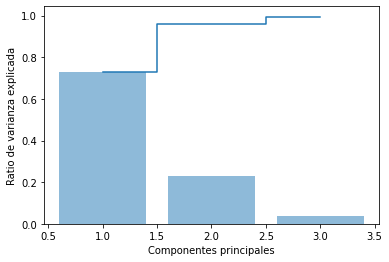

In [37]:
drawVarianza(data)

A partir de 3 componentes tenemos más del 99% de varianza total.

## Entrega

Recuerda guardar tus cambios en tu repositorio utilizando la opción "Save a copy in GitHub..." del menú File.